In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the data
df_ep = pd.read_csv("https://raw.githubusercontent.com/Opeth1973/Project_Assignement_CO2/refs/heads/main/modern-renewable-prod.csv")
df_ep.head()


,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
0,ASEAN (Ember),NaN,2000,0.0,50.45,0.0,22.800000
1,ASEAN (Ember),NaN,2001,0.0,54.33,0.0,22.860000
2,ASEAN (Ember),NaN,2002,0.0,53.29,0.0,23.230000
3,ASEAN (Ember),NaN,2003,0.0,53.21,0.0,23.189999
4,ASEAN (Ember),NaN,2004,0.0,52.99,0.0,24.970000


In [5]:
# Show column names
for col in df_ep.columns:
    print(col)

Entity
Code
Year
Electricity from wind - TWh
Electricity from hydro - TWh
Electricity from solar - TWh
Other renewables including bioenergy - TWh


In [6]:
# Describe data
df_ep.describe()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
count,9208.000000,8235.000000,9061.000000,8203.000000,8427.000000
mean,2000.870547,18.933955,120.149678,8.196874,13.561289
std,15.969769,110.673580,373.777088,61.278450,52.872962
min,1965.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,0.000000,0.100000,0.000000,0.000000
50%,2005.000000,0.000000,3.720000,0.000000,0.055000
75%,2014.000000,0.150000,30.568000,0.030000,1.990751
max,2023.000000,2304.440000,4344.050000,1629.900000,768.550000


In [7]:
# Cleaning data
# Delete rows with no value in Code column
df_ep.dropna(subset=['Code'], inplace=True)
df_ep.head()

,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
24,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
25,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
26,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
27,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
28,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0


In [8]:
# Rename columns
df_ep.rename(columns={"Electricity from wind - TWh": "Wind"}, inplace=True)
df_ep.rename(columns={"Electricity from hydro - TWh": "Hydro"}, inplace=True)
df_ep.rename(columns={"Electricity from solar - TWh": "Solar"}, inplace=True)
df_ep.rename(columns={"Other renewables including bioenergy - TWh": "Other"}, inplace=True)
df_ep.head()

,Entity,Code,Year,Wind,Hydro,Solar,Other
24,Afghanistan,AFG,2000,0.0,0.31,0.0,0.0
25,Afghanistan,AFG,2001,0.0,0.50,0.0,0.0
26,Afghanistan,AFG,2002,0.0,0.56,0.0,0.0
27,Afghanistan,AFG,2003,0.0,0.63,0.0,0.0
28,Afghanistan,AFG,2004,0.0,0.56,0.0,0.0


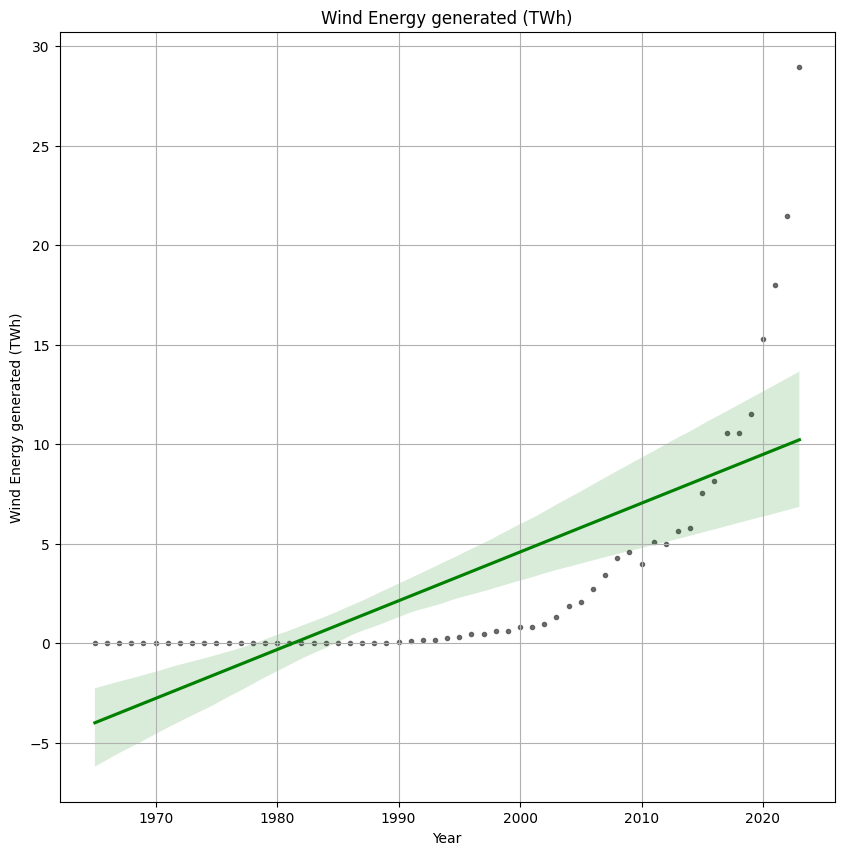

In [27]:
# WIND ENERGY
# # Copy dataset
df_final = df_ep.copy()

# Dataset with only Wind energy and no Zero
df_nld = df_final.loc[df_final["Code"] == "NLD", :]
df_Wind = df_nld.drop(['Hydro', 'Solar', 'Other'], axis=1)
df_Wind.head()

# Plot Wind graph
f, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x = "Year",
            y = "Wind",
            data = df_Wind,
            marker=".",
            color=".3",
            line_kws=dict(color="g"))
plt.title('Wind Energy generated (TWh)')
plt.xlabel('Year')
plt.ylabel('Wind Energy generated (TWh)')
plt.grid(True)
plt.show()

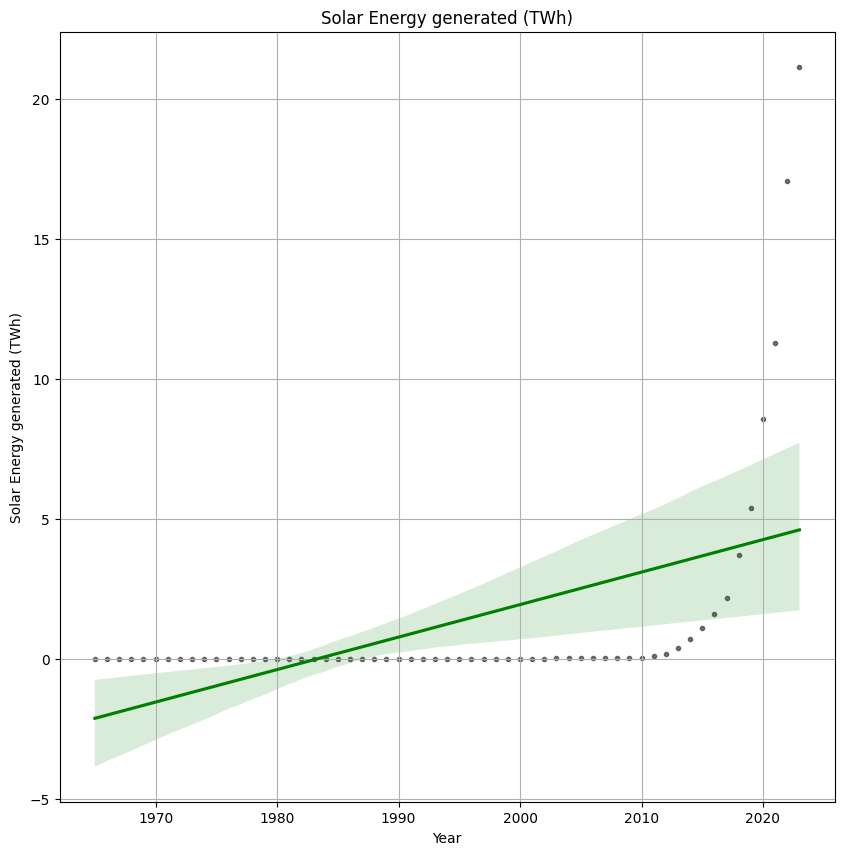

In [24]:
# SOLAR ENERGY
# # Copy dataset
df_final = df_ep.copy()

# Dataset with only Wind energy and no Zero
df_nld = df_final.loc[df_final["Code"] == "NLD", :]
df_Solar = df_nld.drop(['Hydro', 'Wind', 'Other'], axis=1)
df_Solar.head()

# Plot Solar graph
f, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x = "Year",
            y = "Solar",
            data = df_Solar,
            marker=".",
            color=".3",
            line_kws=dict(color="g"))
plt.title('Solar Energy generated (TWh)')
plt.xlabel('Year')
plt.ylabel('Solar Energy generated (TWh)')
plt.grid(True)
plt.show()


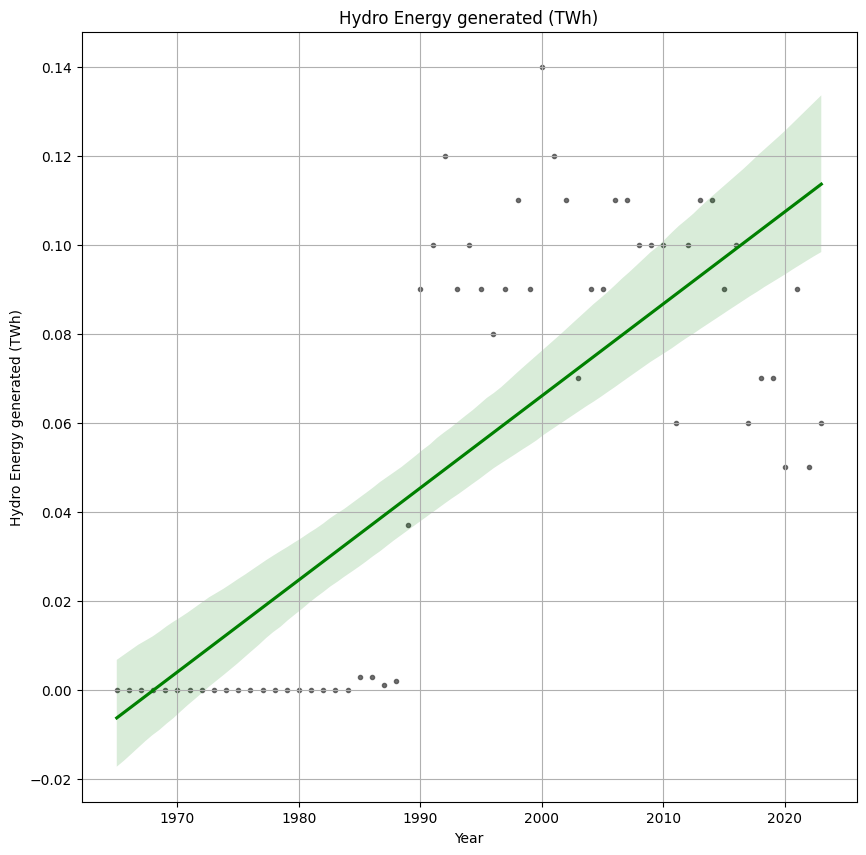

In [25]:
# HYDRO ENERGY
# # Copy dataset
df_final = df_ep.copy()

# Dataset with only Wind energy and no Zero
df_nld = df_final.loc[df_final["Code"] == "NLD", :]
df_Hydro = df_nld.drop(['Solar', 'Wind', 'Other'], axis=1)
df_Hydro.head()

# Plot Hydro graph
f, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x = "Year",
            y = "Hydro",
            data = df_Hydro,
            marker=".",
            color=".3",
            line_kws=dict(color="g"))
plt.title('Hydro Energy generated (TWh)')
plt.xlabel('Year')
plt.ylabel('Hydro Energy generated (TWh)')
plt.grid(True)
plt.show()

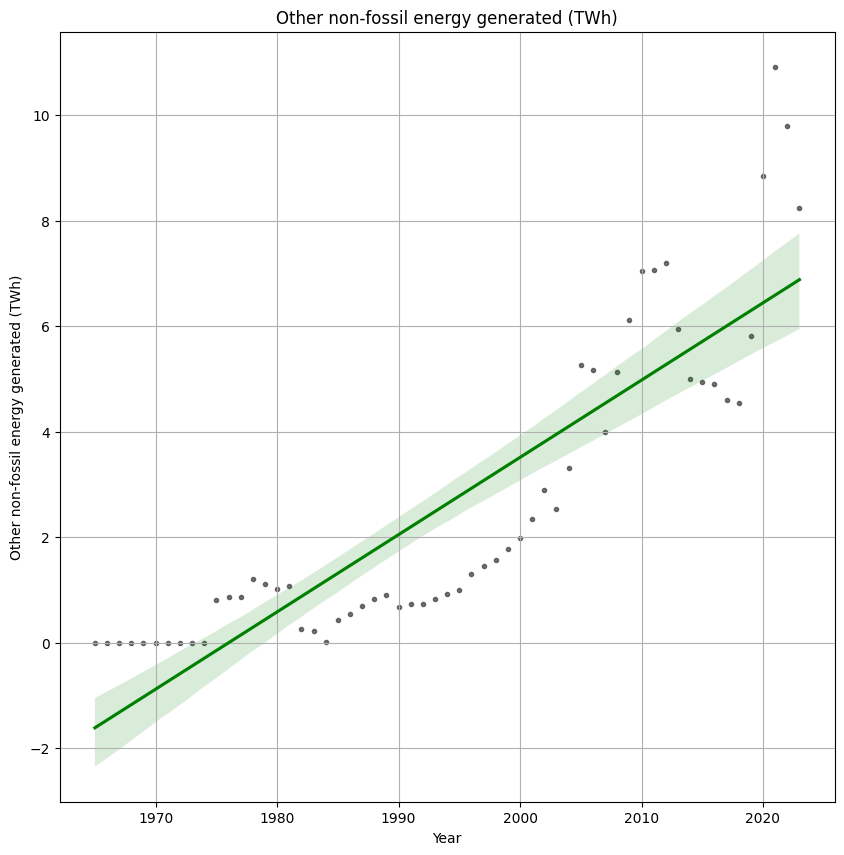

In [26]:
# OTHER ENERGY
# # Copy dataset
df_final = df_ep.copy()

# Dataset with only Wind energy and no Zero
df_nld = df_final.loc[df_final["Code"] == "NLD", :]
df_Other = df_nld.drop(['Solar', 'Wind', 'Hydro'], axis=1)
df_Other.head()

# Plot Other graph
f, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x = "Year",
            y = "Other",
            data = df_Other,
            marker=".",
            color=".3",
            line_kws=dict(color="g"))
plt.title('Other non-fossil energy generated (TWh)')
plt.xlabel('Year')
plt.ylabel('Other non-fossil energy generated (TWh)')
plt.grid(True)
plt.show()